In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as plt

# Define the stocks and date range
stocks_str = ['TSLA', 'NIO', 'XPEV','LI','GM','TM','F','RIVN']
start_date = '2021-01-01'
end_date = '2021-12-31'

# Collect the data
TSLA = yf.download('TSLA', start=start_date, end=end_date)
NIO = yf.download('NIO', start=start_date, end=end_date)
XPEV = yf.download('XPEV', start=start_date, end=end_date)
LI = yf.download('LI', start=start_date, end=end_date)
GM = yf.download('GM', start=start_date, end=end_date)
TM = yf.download('TM', start=start_date, end=end_date)
F = yf.download('F', start=start_date, end=end_date)
RIVN = yf.download('RIVN', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00-05:00,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05 00:00:00-05:00,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06 00:00:00-05:00,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07 00:00:00-05:00,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08 00:00:00-05:00,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


In [3]:
stocks = [TSLA, NIO, XPEV,LI,GM,TM,F,RIVN]

for data in stocks:
    
    # Remove duplicates
    data.drop_duplicates(inplace=True)

    # Handle missing values
    data.fillna(method='ffill', inplace=True)

    # Handle data types
    data = data.astype(float)

    ## delete outliers
    for stock in stocks:
        q1 = data['Adj Close'].quantile(0.25)
        q3 = data['Adj Close'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        data['Adj Close'] = data['Adj Close'].clip(lower_bound, upper_bound)
    
    print(len(data))

## RIVN has fewer data  can be used, hence we remove RIVN which may lead to bias

strocks = [TSLA, NIO, XPEV,LI,GM,TM,F]
stocks_str = ['TSLA', 'NIO', 'XPEV','LI','GM','TM','F']

for stock in range(len(stocks_str)):
    stocks[stock]['Adj Close'] = (stocks[stock]['Adj Close'] - stocks[stock]['Adj Close'].mean()) / stocks[stock]['Adj Close'].std()


251
251
251
251
251
251
251
35


<AxesSubplot:xlabel='Date'>

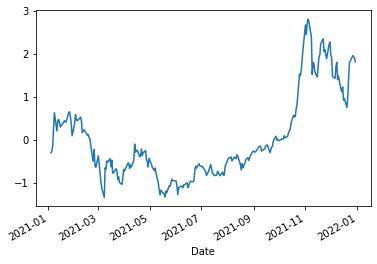

In [4]:
TSLA['Adj Close'].plot()

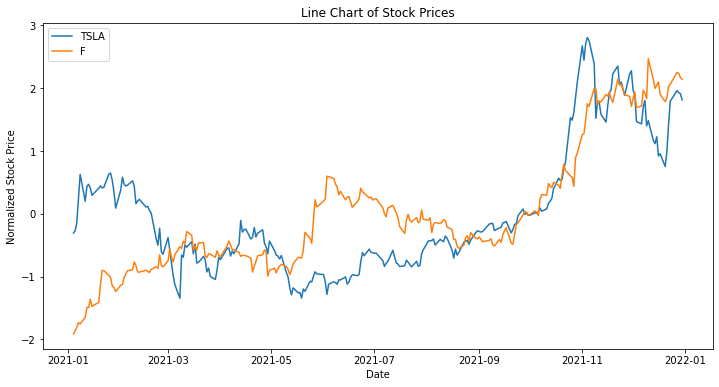

In [5]:
import matplotlib.pyplot as plt
## an example shows comparison
# Line chart of stock prices
plt.figure(figsize=(12, 6))
plt.plot(TSLA['Adj Close'])
plt.plot(F['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend(['TSLA','F'])
plt.title('Line Chart of Stock Prices')
plt.show()

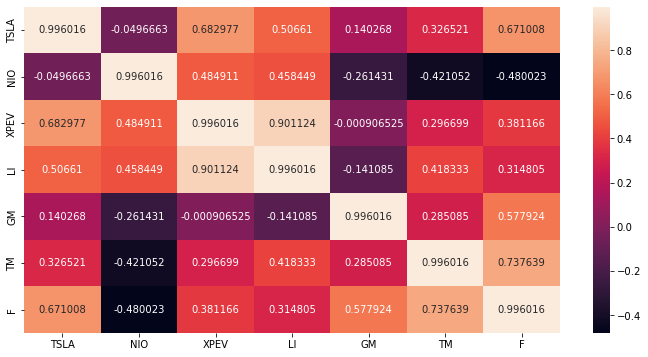

In [6]:
stocks = [TSLA, NIO, XPEV,LI,GM,TM,F]
stocks_str = ['TSLA', 'NIO', 'XPEV','LI','GM','TM','F']
all_adj_close = [i['Adj Close'].values for i in stocks]

import seaborn as sns

cov = np.cov(all_adj_close, bias=True)

plt.figure(figsize=(12, 6))
sns.heatmap(cov, annot=True, fmt='g',xticklabels=stocks_str,yticklabels=stocks_str)

plt.show()

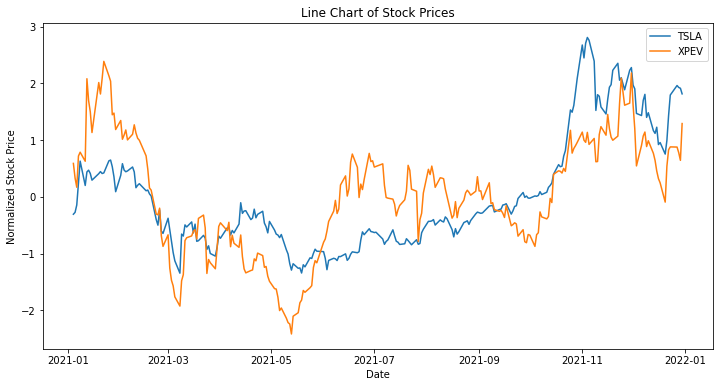

In [7]:
# Line chart of stock prices
plt.figure(figsize=(12, 6))
plt.plot(TSLA['Adj Close'])
plt.plot(XPEV['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend(['TSLA','XPEV'])
plt.title('Line Chart of Stock Prices')
plt.show()

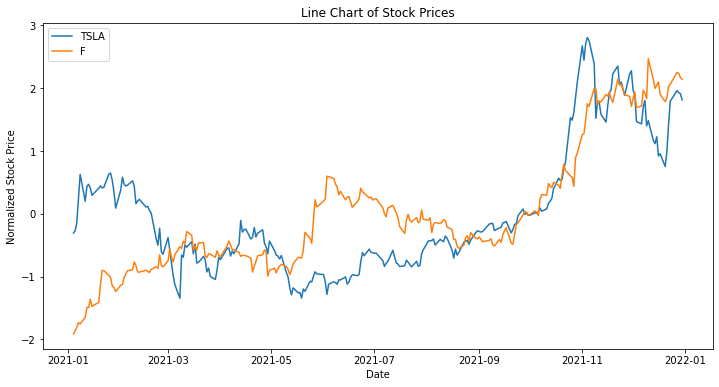

In [8]:
# Line chart of stock prices
plt.figure(figsize=(12, 6))
plt.plot(TSLA['Adj Close'])
plt.plot(F['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend(['TSLA','F'])
plt.title('Line Chart of Stock Prices')
plt.show()

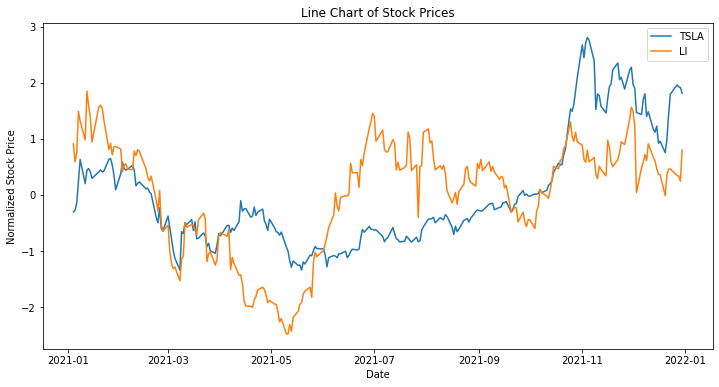

In [9]:
# Line chart of stock prices
plt.figure(figsize=(12, 6))
plt.plot(TSLA['Adj Close'])
plt.plot(LI['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend(['TSLA','LI'])
plt.title('Line Chart of Stock Prices')
plt.show()

[ 0.85060948 -0.48877606 -0.40260008 -0.33287184  0.98278146]
42.26708029261284


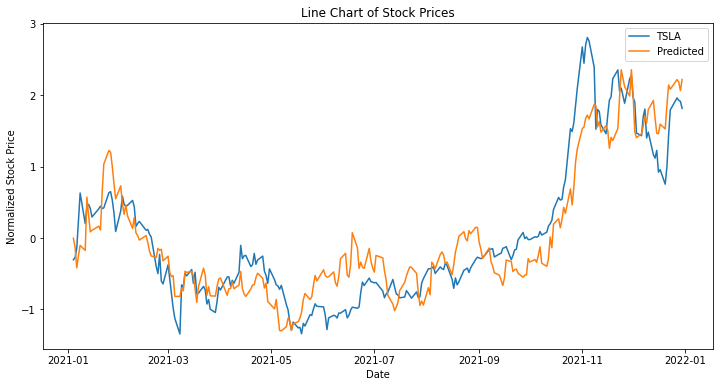

In [10]:
## Linear regression without constant
y = TSLA['Adj Close']

X = pd.DataFrame(all_adj_close[2:])

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.T, y)

print(reg.coef_)

error = y - reg.predict(X.T)
SSR = sum(error**2)
print(SSR)

plt.figure(figsize=(12, 6))
plt.plot(TSLA['Adj Close'])
plt.plot(pd.Series(reg.predict(X.T),index = TSLA.index))
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend(['TSLA','Predicted'])
plt.title('Line Chart of Stock Prices')
plt.show()

[-0.53885223  0.99611509  0.46280063]
69.81232405242137


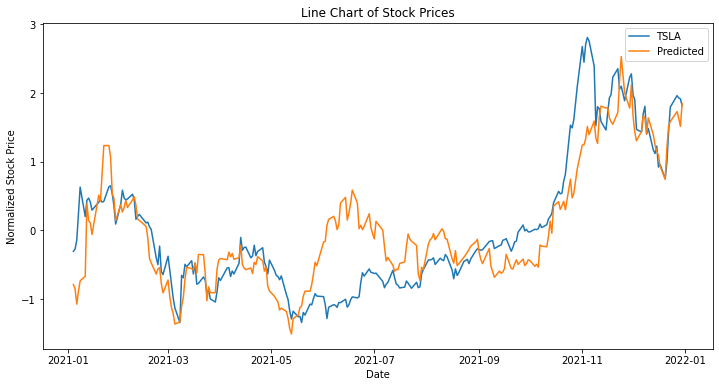

In [11]:
## Linear regression with only NIO, XPEV, F
y = TSLA['Adj Close']

X_3 = pd.DataFrame([LI['Adj Close'], XPEV['Adj Close'], F['Adj Close']])

reg_3 = LinearRegression().fit(X_3.T, y)

print(reg_3.coef_)

error_3 = y - reg_3.predict(X_3.T)
SSR_3 = sum(error_3**2)
print(SSR_3)

plt.figure(figsize=(12, 6))
plt.plot(TSLA['Adj Close'])
plt.plot(pd.Series(reg_3.predict(X_3.T),index = TSLA.index))
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend(['TSLA','Predicted'])
plt.title('Line Chart of Stock Prices')
plt.show()

[-0.28857538  0.62585459 -0.27262829]
12.014105386281315


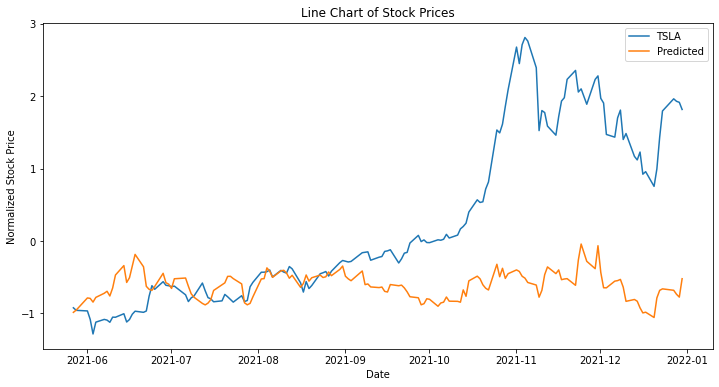

In [12]:
## Linear regression with only NIO, XPEV, F
y = TSLA['Adj Close']

sample_3 = X_3.T.iloc[0:100,]

reg_sample_3 = LinearRegression().fit(sample_3, y[sample_3.index])

print(reg_sample_3.coef_)

error_sample_3 = y[sample_3.index] - reg_3.predict(sample_3)
SSR_sample_3 = sum(error_sample_3**2)
print(SSR_sample_3)

plt.figure(figsize=(12, 6))
plt.plot(y.iloc[100:,])
plt.plot( pd.Series(reg_sample_3.predict(X_3.T.iloc[100:,]),index = TSLA.index[100:]) )
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend(['TSLA','Predicted'])
plt.title('Line Chart of Stock Prices')
plt.show()

f:\programming\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
f:\programming\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
f:\programming\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
f:\programming\ana\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  war

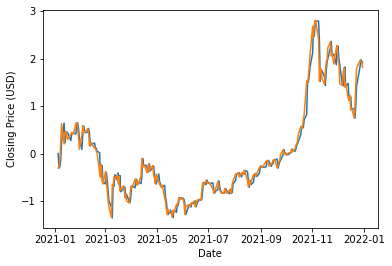

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(TSLA['Adj Close'], order=(3, 1, 1))
model_fit = model.fit()

# make predictions
predictions = model_fit.predict()

# plot the predictions
plt.plot(predictions)
plt.plot(TSLA['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()